# Classifying movie reviews

In [1]:
# Import the IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# The 'num_words=10000' means only keeping the 10000 more frequent words
# Rare classifications will not be taken into account for now

Using TensorFlow backend.


In [2]:
train_data[0] # train_data is a list of review with indexes of words

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
# no word with index larger than 10000 will appear
max([max(sequence) for sequence in train_data])

9999

In [5]:
# map that matches each word to an index
word_index = imdb.get_word_index()
# reversing it
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Turning the lists into tensors

In practice, this means turning the lists into vectors of 1s and 0s. This is the first layer of our network.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of size sequences X dimensions
    results = np.zeros((len(sequences), dimension))
    # for every sequence created, set the specific indices of 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

# finally, vectorize the training data
x_train = vectorize_sequences(train_data)
# and the test data
x_test = vectorize_sequences(test_data)

In [8]:
# taking a look at the first sequence
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# taking a look at the vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

With the data arranged as a tensor (that is, vectorized), we can now more forward to build the network. 

Our dataset contains vectors of labels as integers (0 or 1). The type of network that works well with this dataset is the one with fully conected layers ("Dense" layers) with relu activations. This is achieved by ```Dense(16, activation=relu)```. 

The number being passed as an argument is the number of hidden units of the layer. A hidden unit is a dimension in the representation space of the layer. 

In [10]:
from keras import models
from keras import layers

# Create the model
model = models.Sequential()

# Add the model's layers
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Loss function and optimizer

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



# Model Validation

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8685
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2179 - binary_accuracy: 0.9287 - val_loss: 0.3088 - val_binary_accuracy: 0.8712
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1750 - binary_accuracy: 0.9439 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1427 - binary_accuracy: 0.9542 - val_loss: 0.2841 - val_binary_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1150 - binar

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

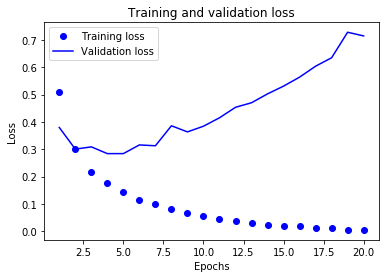

In [16]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


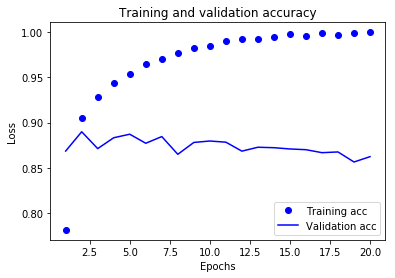

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1983 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 73us/step


In [19]:
results

[0.32364146733283994, 0.87324]

In [20]:
model.predict(x_test)

array([[0.13918307],
       [0.9997023 ],
       [0.2933074 ],
       ...,
       [0.0718087 ],
       [0.04325807],
       [0.47979227]], dtype=float32)